# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier
%matplotlib inline

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

### Part 1

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MLP = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', \
                   verbose=10, tol=1e-4, random_state=42,learning_rate_init=.1)
mod_fit = MLP.fit(X_train,y_train)
mod_pred_is = mod_fit.predict(X_train)
mod_pred_os = mod_fit.predict(X_test)
print("Training set score defaults Params: %f" % MLP.score(X_train, y_train))
print("Test set score defaults Params: %f" % MLP.score(X_test, y_test))

Iteration 1, loss = 0.24522635
Iteration 2, loss = 0.10589741
Iteration 3, loss = 0.07488529
Iteration 4, loss = 0.05895084
Iteration 5, loss = 0.04782934
Iteration 6, loss = 0.03945315
Iteration 7, loss = 0.03320940
Iteration 8, loss = 0.02872414
Iteration 9, loss = 0.02451143
Iteration 10, loss = 0.02132893
Training set score defaults Params: 0.995620
Test set score defaults Params: 0.980290


### Part 2

In [6]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.1,0.01,0.001], 'activation':['logistic', 'relu']}
crossVal = GridSearchCV(MLPClassifier(), params)
CVModel = crossVal.fit(X_train,y_train)

In [8]:
CVmod_pred_os = CVModel.predict(X_test)
print("Test set score w/CV Params: %f" % CVModel.score(X_test, y_test))
print "Best Params:", CVModel.best_params_

Test set score w/CV Params: 0.983610
Best Params: {'alpha': 0.1, 'activation': 'relu'}


#### Explanation

Given the accuracy score, we see the model with the cross-validated parameters do better (albeit only very slightly). The cross-validation shows, as you see above, that the best parameters are alpha=0.1 (compared to 0.0001 in default) and activation='relu' (same as default). This means that we have increased our regularization penalty, which decreases the possibility of overfitting, thereby increasing our out-of-sample accuracy. In terms of the activation, relu (the default parameter) was also found to be the best in cross-validation. The ReLU function maps negative inputs to 0 and positive outputs to f(x) = x, whereas the logistic function has a sigmoid threshold. One of the differences between relu and logistic activation function is that relu is faster at learning due to its constant gradient (not vanishing gradient like in logistic), which can be better for us here since we're only doing 10 iterations (probably why this was chosen to be better)

### Part 3

In [9]:
wrong_image_index = []
wrong_image_pred = []
wrong_image_actual = []
for i,pred in enumerate(CVmod_pred_os):
    if pred != y_test[i]:
        wrong_image_index.append(i)
        wrong_image_pred.append(pred)
        wrong_image_actual.append(y_test[i])

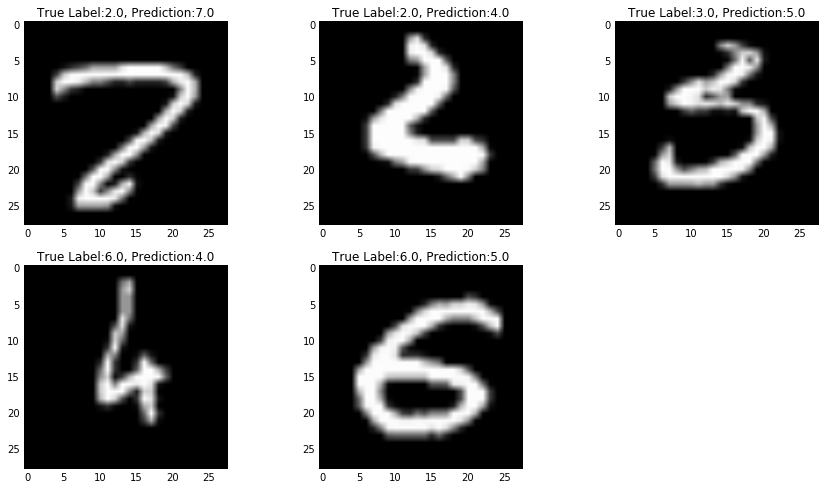

In [11]:
import pandas as pd
import numpy as np
import matplotlib

fig = plt.figure(figsize=(15, 8))

for i,pixels in enumerate(X_test[wrong_image_index[:5]]):
    image = pixels.reshape((28, 28))
    # Plot
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title('True Label:{label}, Prediction:{pred}'.format(label=wrong_image_actual[i], pred=wrong_image_pred[i]))
    ax.imshow(image, cmap='gray')

plt.show()


# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

### Part 1

In [7]:
import pandas as pd 
from patsy import dmatrices
import warnings
from sklearn.cross_validation import train_test_split
from sklearn import tree
%pylab inline
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

hitters = pd.read_csv("Hitters.csv")

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vishwa\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
`%matplotlib` prevents importing * from pylab and numpy


In [12]:
import copy
X=copy.deepcopy(hitters)
y = hitters['Salary']
del X['Salary']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [13]:
regressor = tree.DecisionTreeRegressor(random_state=42, max_depth = 5)
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print "mse(train) : " + str(mean_squared_error(y_train_pred, y_train))
print "mse(test) : " + str(mean_squared_error(y_test_pred, y_test))

mse(train) : 18843.5502281
mse(test) : 214094.73934


### Part 2

In [14]:
regressor = tree.DecisionTreeRegressor(random_state=42, max_depth = 2)
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print "mse(train) : " + str(mean_squared_error(y_train_pred, y_train))
print "mse(test) : " + str(mean_squared_error(y_test_pred, y_test))

mse(train) : 69521.9671959
mse(test) : 168079.550851


### Part 3

The tree with a depth of 5 is doing worse on the test data as compared to a depth of 2 because it's overfitting the train data. On the other hand, the depth of 2 has a lower MSE because it is relatively higher bias lower variance tree. 

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

### Part 1

In [16]:
clf = SVR()
clf.fit(x_train, y_train)

y_train_pred_svr1=clf.predict(x_train)
y_test_pred_svr1=clf.predict(x_test)

print "rmse(train) : " + str(math.sqrt(mean_squared_error(y_train_pred_svr1,y_train)))
print "rmse(test) : " + str(math.sqrt(mean_squared_error(y_test_pred_svr1, y_test)))

rmse(train) : 0.174703118961
rmse(test) : 0.549667753896


### Part 2

In [17]:
clf = SVR(kernel="linear")
clf.fit(x_train, y_train)

y_train_pred_svr2=clf.predict(x_train)
y_test_pred_svr2=clf.predict(x_test)

print "rmse(train) : " + str(math.sqrt(mean_squared_error(y_train_pred_svr2,y_train)))
print "rmse(test) : " + str(math.sqrt(mean_squared_error(y_test_pred_svr2, y_test)))

rmse(train) : 0.477967720085
rmse(test) : 0.231968041522


In [18]:
reg = LinearRegression()
reg.fit(x_train,y_train)

y_train_pred_linear=reg.predict(x_train)
y_test_pred_linear=reg.predict(x_test)

print "rmse(train) : " + str(math.sqrt(mean_squared_error(y_train_pred_linear, y_train)))
print "rmse(test) : " + str(math.sqrt(mean_squared_error(y_test_pred_linear, y_test)))

rmse(train) : 0.458060629343
rmse(test) : 0.260057137391


### Part 3
The SVR with "rbf" kernel performs better if we have a lot of data. Number of data points for train are 200 and for test are 50, which is very less, leading the model to overfit the training set. So, the 'rbf' kernel doesn't perform  well on the test data. 
SVR with 'Linear' kernel and linear regression models perform similarly, with SVR(linear) being slightly better on test data. We think this is because the SVR cost function is more robust to outliers (we discuss this further in the next question), so it is less likely to overfit the outliers.

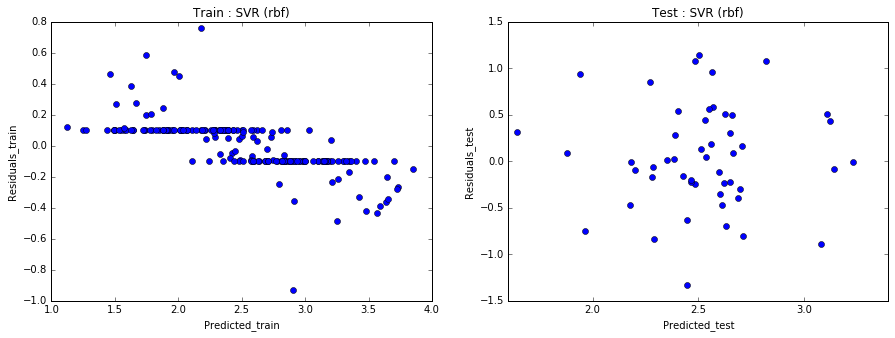

In [23]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.plot(y_train_pred_svr1,(y_train_pred_svr1- y_train), 'o')
ax.set_xlabel('Predicted_train')
ax.set_ylabel('Residuals_train')
ax.set_title('Train : SVR (rbf)')

ax1 = fig.add_subplot(1,2,2)
ax1.plot(y_test_pred_svr1,(y_test_pred_svr1- y_test), 'o')
ax1.set_xlabel('Predicted_test')
ax1.set_ylabel('Residuals_test')
ax1.set_title('Test : SVR (rbf)')

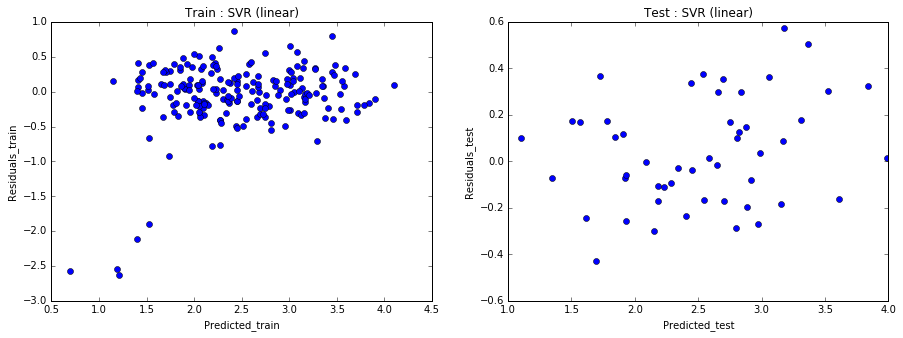

In [24]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.plot(y_train_pred_svr2,(y_train_pred_svr2- y_train), 'o')
ax.set_xlabel('Predicted_train')
ax.set_ylabel('Residuals_train')
ax.set_title('Train : SVR (linear)')

ax1 = fig.add_subplot(1,2,2)
ax1.plot( y_test_pred_svr2,(y_test_pred_svr2- y_test), 'o')
ax1.set_xlabel('Predicted_test')
ax1.set_ylabel('Residuals_test')
ax1.set_title('Test : SVR (linear)')

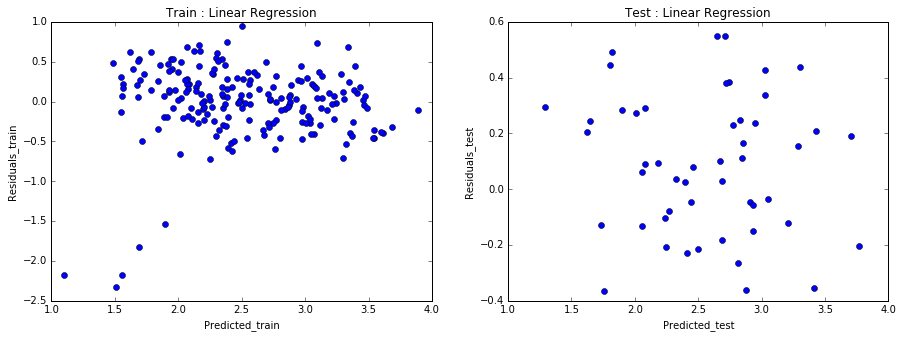

In [26]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.plot( y_train_pred_linear,(y_train_pred_linear- y_train), 'o')
ax.set_xlabel('Predicted_train')
ax.set_ylabel('Residuals_train')
ax.set_title('Train : Linear Regression')

ax1 = fig.add_subplot(1,2,2)
ax1.plot(y_test_pred_linear,(y_test_pred_linear- y_test), 'o')
ax1.set_xlabel('Predicted_test')
ax1.set_ylabel('Residuals_test')
ax1.set_title('Test : Linear Regression')

- SVR with RBF kernel fits the train data very well (it's overfitting). As can be seen in the plot, most of the residuals are cluttered together near zero. The SVR with RBF kernel doesn't seem affected by outliers.
- SVR with linear kernel doesn't fit the train data very well since it's susceptible to outliers. Because the model tried to fit outliers, the predictions of other points are also off. This is the reason for a higher error on the train data set. However, since it uses a linear cost function (outside the 'no-man zone'), it is still slightly more robust to the outliers than the linear regression.
- Linear Regression reacts to the outliers similar to 'linear' kernels. Therefore, we have a higher train error since the model tries to take outliers into account while fitting. 

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

### Part a

$$ P(C=True|X=True,Y=True) = \frac{P(X=T,Y=T|C)P(C=T)}{P(C,X=T,Y=T)} $$

$$ = \frac{P(X=T|C)P(Y=T|C)P(C=T)}{[P(C=T)P(X|C=T)P(Y|C=T)]+[P(C=F)P(X|C=F)P(Y|C=F)]}$$

$$ = \frac{0.75\times0.25\times0.5}{[0.5\times0.75\times0.25]+[(0.5\times0.5\times0.5]}$$

$$ = \frac{3}{7} $$

### Part b

For the first network, $ P(C|X,Y,Z) = P(C|X,Y) $. Since Z is determined by X and Y, the probability of Z doesn't provide any additional info in determining the probability of C, so we can basically "cancel it out" of the join probability equation.

For the second network, $ P(C|X,Y,Z) \neq P(C|X,Y) $. Since Y is the child of Z and C, we can't "cancel out" Z, so it does impact the probability of C.

# Question 5: Mulitclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

1. Briefly describe the  One-vs.-All method.  (2pts)

2. What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

### Part 1
When we have multiple classes, the one vs. all method fits a binary classifier to each of the classes. Essentially for x classes, we have x classifiers, with the i-th classifier trained to identify if an input is in the i-th class. When making a decision, we choose the class which has the highest confidence score (highest posterior probability).

### Part 2
One disadvantage is that you will end up with N classifiers, which will each be very "large", because each will be looking at one class against all the classes. This means that is N is very large, the method will be computationally expensive.

A second disadvantage is that if N is very large, then for each classifier, there will be a class imbalance. The i-th classifier will be trying to identify only the i-th class, so the number of positive points will be significantly smaller than the number of negative points if N is large. This can make each of the classifiers less effective, which can reduce overall accuracy.